# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Clasroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [154]:
#import modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.4)

import os 
import cv2 as cv2

import tensorflow as tf 

from sklearn.metrics import confusion_matrix
from tqdm import tqdm

In [155]:
absolute_path = "C:/Users/pilar/Edition_Jun2020/Repositorios_GitHub/DataSets/landscapes"
relative_path = "../../../../DataSets/landscapes"
train_path = "/seg_train/"
test_path = "/seg_test/"

In [156]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (32, 32)

In [157]:
#Para descargar los datos

def load_data():
    datasets = [ "../../../../DataSets/landscapes/seg_train/",
                "../../../../DataSets/landscapes/seg_test/"]
    output = []
    # iteramos por el training y el test
    for dataset in datasets:
        images = []
        labels = []
        print("Loading {}".format(dataset))
        # iteramos en cada directorio correspondiente a cada categoría
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            # iteramos en cada imagen de cada directorio
            # tqdm es un medidor de progreso
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                # tomamos el nombre de la imagen
                img_path = os.path.join(os.path.join(dataset, folder), file)
                # abrimos y cambiamos el tamaño de la imagen
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                # Insertamos la imagen y su etiqueta
                images.append(image)
                labels.append(label)
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        output.append((images, labels))
    return output


In [158]:
(train_images, train_labels),(test_images, test_labels) = load_data()

100%|██████████| 501/501 [00:00<00:00, 1291.11it/s]


In [159]:
n_train = train_labels.shape[0]

In [160]:
n_test = test_labels.shape[0]

In [161]:
print(f'Number of training examples: {n_train}')
print(f'Number of training examples: {n_test}')
print(f"Each image is of size: {IMAGE_SIZE}")

Number of training examples: 14034
Number of training examples: 3000
Each image is of size: (32, 32)


In [162]:
_ , train_counts = np.unique(train_labels, return_counts=True)

In [163]:
_, test_counts = np.unique(test_labels, return_counts=True)

<AxesSubplot:>

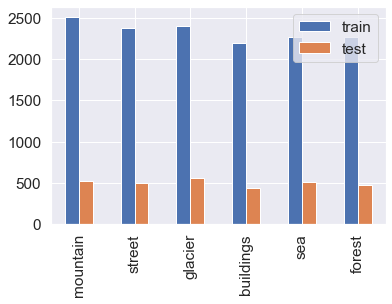

In [164]:
df_count_values = pd.DataFrame({'train': train_counts,
              'test': test_counts},
              index= class_names)
df_count_values.plot.bar()

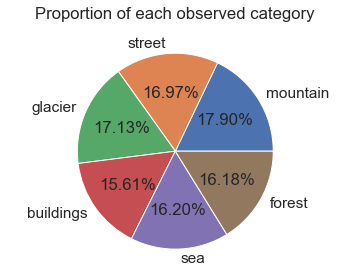

In [165]:
plt.pie(train_counts,
        explode=(0,0,0,0,0,0),
        labels=class_names,
        autopct= '%1.2f%%') # '%' inicio expresion regular 1.1 == num_de_enteros.num_de_decimales 'f'=float '%%'== cierre de expresión regular
plt.axis('equal')
plt.title('Proportion of each observed category\n');

In [166]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [167]:
def display_ramdom_images(class_names, images, labels):
    """
    Display a random images from the images array and its correspond label formthe labels array
    """
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.axis('off')
    plt.grid(False)
    plt.title('Image #{}: '.format(index) + class_names[labels[index]])

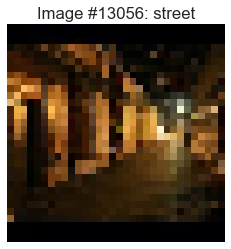

In [168]:
display_ramdom_images(class_names, train_images, train_labels)

In [169]:
#las 25 primeras imágenes

def display_examples(class_names, images, labels):
    """
    Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5, i+1)
        plt.axis('off')
        plt.grid(False)
        plt.imshow(images[i], cmap= plt.cm.binary)
        plt.xlabel(class_names[labels[i]])

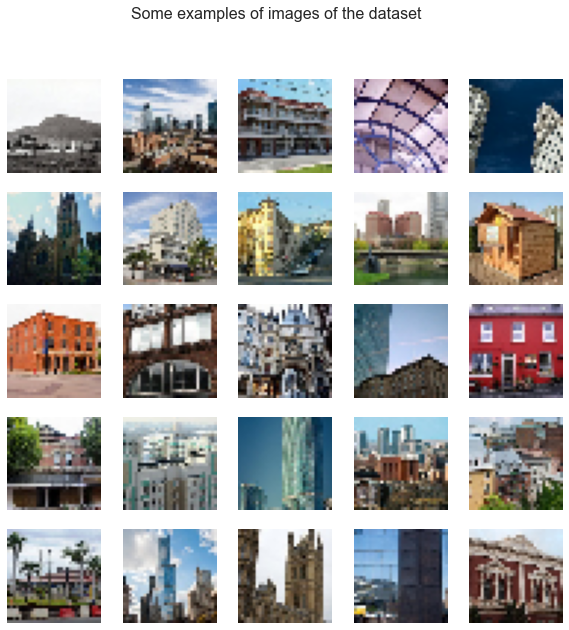

In [170]:
display_examples(class_names, train_images, train_labels)

In [171]:
#1.- Create the model 
#2.- Model compile
#3.- Train/fit with model datas
#4.- Evaluate with test datas
#5.- Error analist

In [172]:
# Simple  model with:
# * Conv2D: (32 filters of (3x3))
# * Maxplooling2D(half size images)
# * Flatten: transformation 2D to 1D with 150 150 pixels value 3 
# * Relu: dado un valor x, devuelve max(x,0)
# *Softmax: 6 neuronas, es la probabilidad de que la imagen pertenezca a una da las clases

In [173]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters= 32,
                              kernel_size= (3,3),
                              activation= 'relu',
                              input_shape= (IMAGE_SIZE[0],IMAGE_SIZE[1],3)))
model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2)))

model.add(tf.keras.layers.Conv2D(filters= 32,
                              kernel_size= (3,3),
                              activation= 'relu',
                              input_shape= (32,32,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units= 100,
                             activation='relu'))

model.add(tf.keras.layers.Dense(units=6, activation= 'softmax'))

In [174]:
model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

In [175]:
train_labels

array([3, 3, 3, ..., 1, 1, 1])

In [176]:
df_train_labels = pd.DataFrame(train_labels, columns=['category'])
df_train_labels

,category
0,3
1,3
2,3
3,3
4,3
...,...
14029,1
14030,1
14031,1
14032,1


In [177]:
# Label Encoding 
from keras.utils.np_utils import to_categorical #covert to one-hot-encoding

train_y_labels = to_categorical(df_train_labels, num_classes= 6)

In [178]:
train_y_labels

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [179]:
#from sklearn.utils import shuffle

X_train, y_train = shuffle(train_images,train_y_labels, random_state= 42)

In [184]:
train_y_labels.shape


(14034, 6)

In [185]:
train_images.shape

(14034, 32, 32, 3)

In [186]:
X_train.shape, y_train.shape

((14034, 32, 32, 3), (14034, 6))

In [95]:
earlystop = tf.keras.callbacks.EarlyStopping(patience= 4, restore_best_weights= True)

In [187]:
history = model.fit(X_train,
                    y_train,
                    epochs= 10,
                    batch_size=128,
                    validation_split=0.20
                    )


Epoch 1/10
88/88 [==============================] - 9s 95ms/step - loss: 1.4335 - accuracy: 0.4208 - val_loss: 1.0283 - val_accuracy: 0.6056
Epoch 2/10
88/88 [==============================] - 9s 101ms/step - loss: 0.9984 - accuracy: 0.6207 - val_loss: 0.9454 - val_accuracy: 0.6430
Epoch 3/10
88/88 [==============================] - 8s 96ms/step - loss: 0.8847 - accuracy: 0.6656 - val_loss: 0.8268 - val_accuracy: 0.6812
Epoch 4/10
88/88 [==============================] - 8s 95ms/step - loss: 0.8064 - accuracy: 0.7005 - val_loss: 0.7996 - val_accuracy: 0.6986
Epoch 5/10
88/88 [==============================] - 8s 95ms/step - loss: 0.7575 - accuracy: 0.7178 - val_loss: 0.7464 - val_accuracy: 0.7300
Epoch 6/10
88/88 [==============================] - 8s 96ms/step - loss: 0.6906 - accuracy: 0.7515 - val_loss: 0.7304 - val_accuracy: 0.7342
Epoch 7/10
88/88 [==============================] - 9s 101ms/step - loss: 0.6538 - accuracy: 0.7649 - val_loss: 0.6999 - val_accuracy: 0.7431
Epoch 8/10


In [ ]:
"""
history = model.fit(train_imges,
                    train_labels,
                    epochs= 10,
                    batch_size=128,
                    validation_split=0.20
                    )
                    """

In [149]:
history.history['val_accuracy'][-1]

0.7527609467506409

In [150]:
def plot_accuracy_loss(history):
    """
    Plot the accuracy and the loss during the training of the nn
    """
    fig = plt.figure(figsize=(15,10))
    # plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label = 'acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label = 'loss')
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()


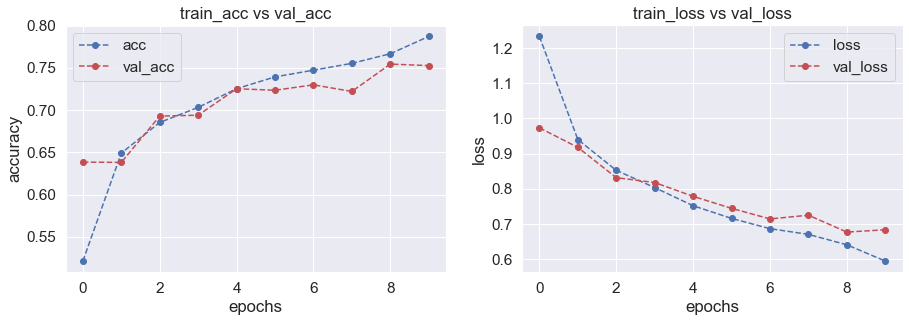

In [151]:
plot_accuracy_loss(history)

In [152]:
test_labels

array([3, 3, 3, ..., 1, 1, 1])

In [188]:
df_test_labels = pd.DataFrame(test_labels, columns=['category'])
test_y_labels = to_categorical(df_test_labels, num_classes= 6)


In [189]:
X_test, y_test = shuffle(test_images,test_y_labels, random_state= 42)

In [190]:
test_loss = model.evaluate(X_test, y_test)

94/94 [==============================] - 1s 6ms/step - loss: 0.7421 - accuracy: 0.7287


In [191]:
test_loss

[0.7420676350593567, 0.7286666631698608]

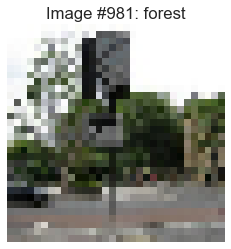

In [195]:
predictions = model.predict(X_train) #vector de probabilidades

pred_labels = np.argmax(predictions, axis=1)

display_ramdom_images(class_names, X_test, pred_labels)

In [201]:
test_labels

array([3, 3, 3, ..., 1, 1, 1])

In [202]:
pred_labels

array([3, 3, 1, ..., 2, 3, 4], dtype=int64)

In [225]:
#analisis del error
def print_mislabels_images(class_names, test_images, test_labels, pred_labels):
    """
    Print 25 examples of mislabeled images by the classifier,
    when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeded_indices = np.where(BOO == 0)
    mislabeded_images = test_images[mislabeded_indices]
    mislabeded_labels = pred_labels[mislabeded_indices]
    
    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names, mislabeded_images, mislabeded_labels)

In [228]:
print_mislabels_images(class_names, test_images, test_labels, pred_labels)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:

   
    mislabeded_indices = pred_labels[mislabeded_indices]

    title = "Somo example of mislabeled images by the classifier"

    display_examples(class_names, mislabeded_indices, mislabeded_labels)